1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions:
Labrador_retriever → 51.42%
golden_retriever → 8.16%
Rhodesian_ridgeback → 5.34%
----------------------------------------


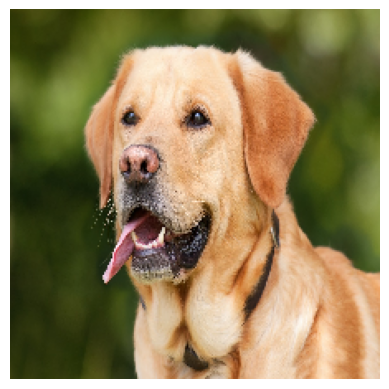

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predictions:
tiger_cat → 43.53%
Egyptian_cat → 15.62%
tabby → 15.38%
----------------------------------------


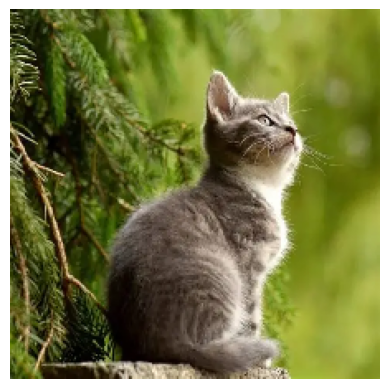

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Load pretrained CNN model
model = MobileNetV2(weights='imagenet')
# Image paths (your uploaded images)
image_paths = [
    "/content/dog.jpg",
    "/content/cat.webp"
]
# Function to detect animal
def detect_animal(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=3)[0]
    # Display image
    plt.imshow(img)
    plt.axis('off')
    # Print predictions
    print("Predictions:")
    for label in decoded:
        print(f"{label[1]} → {label[2]*100:.2f}%")
    print("-" * 40)
    plt.show()
# Run detection on each image
for img_path in image_paths:
    detect_animal(img_path)